## Read and Clean data

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
sales = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "Regions",
    "Where",
    "Additional service ",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year",
    "duration"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

sales = sales.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "Regions": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "Where": "Location",
    "duration": "Duration",
    "Additional service ": "Additional Service"
})

sales["Price"] = sanitize_numbers(sales["Price"])
sales["Sales"] = sanitize_numbers(sales["Sales"])
sales["Sales Last Year"] = sanitize_numbers(sales["Sales Last Year"])
sales["Views"] = sanitize_numbers(sales["Views"])
sales["Views Last Year"] = sanitize_numbers(sales["Views Last Year"])
sales["Views Last Year"] = sales["Views Last Year"]
sales["Quantity"] = sanitize_numbers(sales["Quantity"])
sales["Quantity Last Year"] = sanitize_numbers(sales["Quantity Last Year"])
sales["Name"] = sales["Name"].astype("string")
sales["Category"] = sales["Category"].astype("category")
sales["Type"] = sales["Type"].astype("string")
sales["Region"] = sales["Region"].astype("string")
sales["Location"] = sales["Location"].astype("string")
sales["Additional Service"] = sales["Additional Service"].astype("string")


## Basic description

In [127]:
sales.describe(exclude=["int64", "string", "category"])

,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,289.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,39.010381,371.962630,3417.973486,631.177453,17.139875,1733.129958,606.592902,9.200418
std,21.668667,633.333879,17987.235829,3104.479209,87.996216,9544.780526,3427.975840,52.401467
min,10.000000,29.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,154.450000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,215.900000,221.550000,82.000000,1.000000,0.000000,42.000000,0.000000
75%,60.000000,359.400000,1098.940000,296.500000,6.000000,457.665000,295.500000,2.000000
max,150.000000,7531.900000,227698.100000,56225.000000,1519.000000,130537.920000,61171.000000,871.000000


# Analysis

## --- Categories ---

### Categories Weight in last year's Sales


Category
Astronaute                        0.00
montgolfière / ballon             0.00
simulateur de chute libre         0.00
Simulateur de vol              1914.75
avion de chasse                9082.83
ULM                           60566.50
Avion                         83980.33
Hélicoptère                  171365.51
montgolfière                 503259.33
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, 'Category repartition in Last Year Sales')

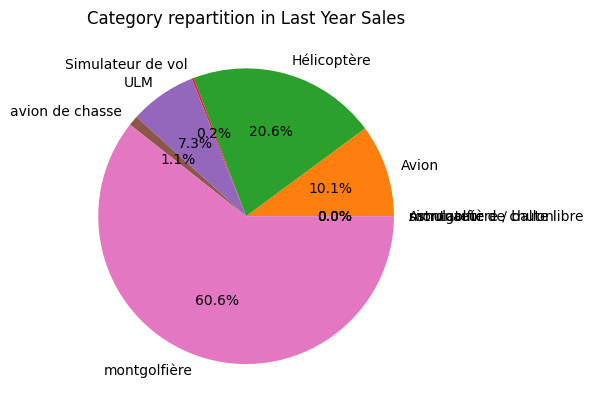

In [128]:
sales_by_category = sales.groupby("Category")["Sales"].sum()
sales_by_category_last_year = sales.groupby("Category")["Sales Last Year"].sum()
categories = sales_by_category.keys()

print(sales_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category_last_year, labels=sales_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Sales")


### Categories Weight in this years sales



Category
Astronaute                         0.00
montgolfière / ballon              0.00
simulateur de chute libre          0.00
Simulateur de vol               3379.95
avion de chasse                 8937.02
Avion                          73772.90
ULM                            91299.87
Hélicoptère                   230993.12
montgolfière                 1228826.44
Name: Sales, dtype: float64


Text(0.5, 1.0, 'Category repartition in This Year Sales')

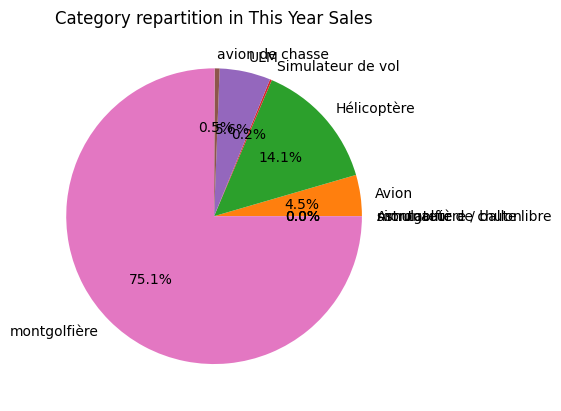

In [129]:
print(sales_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Sales")

### Sales evolution by Category

Category
Avion                        -12.15%
avion de chasse               -1.61%
Hélicoptère                    34.8%
ULM                           50.74%
Simulateur de vol             76.52%
montgolfière                 144.17%
Astronaute                      nan%
montgolfière / ballon           nan%
simulateur de chute libre       nan%
Name: Sales, dtype: object


Text(0.5, 1.0, 'Sales (in euros) by Category by Year')

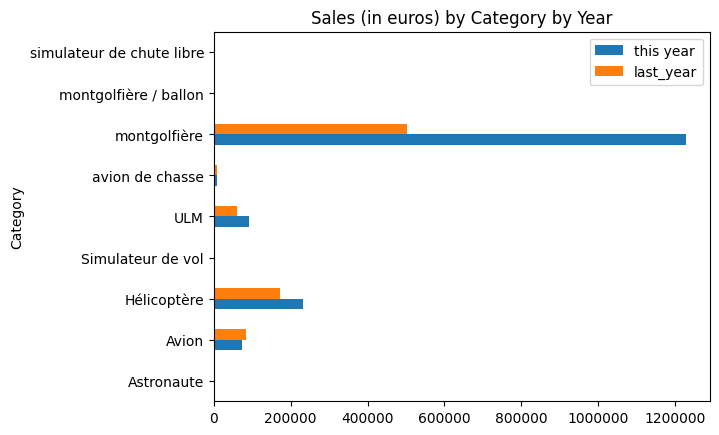

In [152]:
from matplotlib.ticker import FormatStrFormatter

sales_evo_by_category = pd.concat([sales_by_category_last_year, sales_by_category], axis=1)
percentage = (sales_evo_by_category[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_category, "last_year":sales_by_category_last_year}, index=categories)
ax = df.plot.barh()
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title("Sales (in euros) by Category by Year")

Category
Astronaute                      0.0
montgolfière / ballon           0.0
simulateur de chute libre       0.0
avion de chasse                 4.0
Simulateur de vol              19.0
Avion                         578.0
Hélicoptère                   791.0
ULM                           814.0
montgolfière                 2201.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, 'Category repartition in Last Year Quantities')

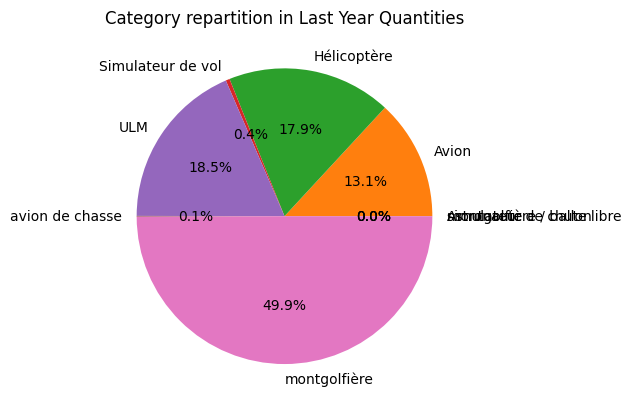

In [153]:
quantity_by_category = sales.groupby("Category")["Quantity"].sum()
quantity_by_category_last_year = sales.groupby("Category")["Quantity Last Year"].sum()
categories = quantity_by_category.keys()

print(quantity_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category_last_year, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Quantities")

### Categories Weight in this year's Quantities

Category
Astronaute                      0.0
montgolfière / ballon           0.0
simulateur de chute libre       0.0
avion de chasse                 3.0
Simulateur de vol              34.0
Avion                         582.0
ULM                          1034.0
Hélicoptère                  1188.0
montgolfière                 5369.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, 'Category repartition in This Year Quantities')

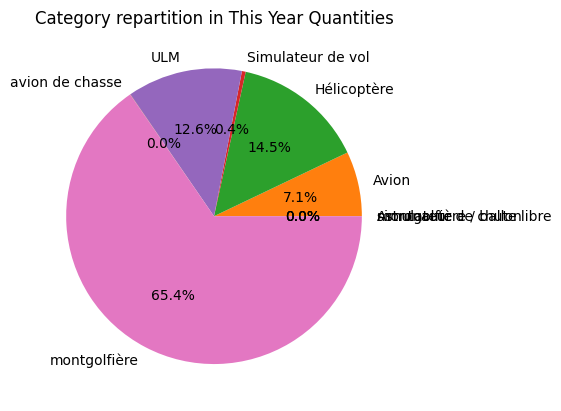

In [132]:
print(quantity_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Quantities")

### Quantities evolution by Category

Category
avion de chasse       -25.0%
Avion                  0.69%
ULM                   27.03%
Hélicoptère           50.19%
Simulateur de vol     78.95%
montgolfière         143.93%
Name: Quantity, dtype: object


Text(0.5, 1.0, 'Sales (in quantity) by Category by Year')

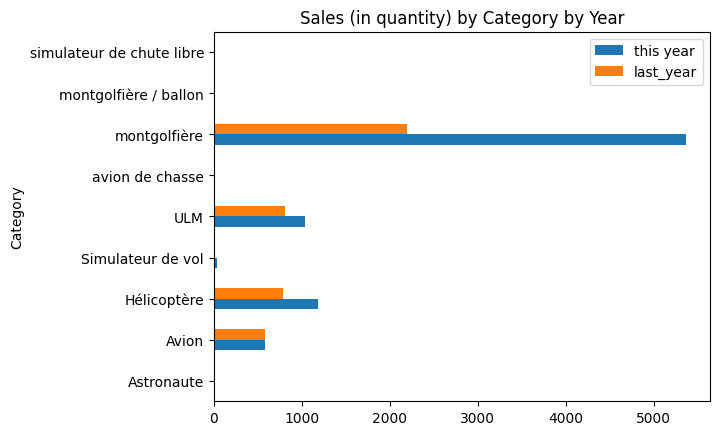

In [175]:
quantities_evo_by_category = pd.concat([quantity_by_category_last_year, quantity_by_category], axis=1)
percentage = (quantities_evo_by_category[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_category, "last_year":quantity_by_category_last_year}, index=categories)
ax = df.plot.barh()
ax.set_title("Sales (in quantity) by Category by Year")

## --- Regions ---


### Regions Weight in last year's Sales

Region
Bretagne                        0.00
Franche-Comté                   0.00
Grand Est                       0.00
Pays de la Loire              782.92
Bourgogne-Franche-Comté      1494.83
hors france                  4790.83
Hauts-de-France              7935.17
Occitanie                   10929.57
PACA & Corse                12512.50
Paris & Île-de-France       23511.01
Normandie                   31604.17
Nouvelle-Aquitaine          34097.49
Auvergne-Rhône-Alpes        99454.25
Centre-Val de Loire        129761.34
France entière             473295.17
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, "Regions repartition in last year's Sales")

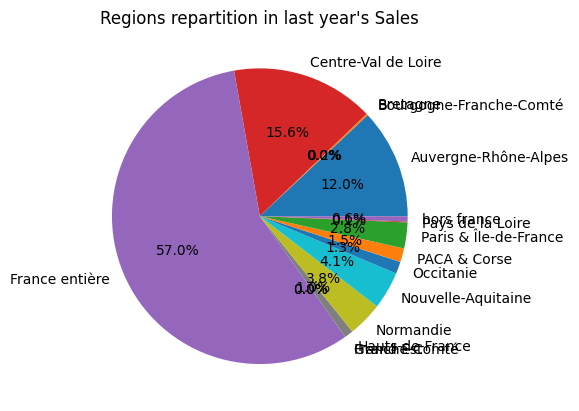

In [134]:
sales_by_region = sales.groupby("Region")["Sales"].sum()
sales_by_region_last_year = sales.groupby("Region")["Sales Last Year"].sum()
regions = sales_by_region.keys()

print(sales_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region_last_year, labels=sales_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Sales")

Region
Franche-Comté                 998.20
hors france                  4047.99
Pays de la Loire             4695.01
Bretagne                     5007.68
PACA & Corse                12673.17
Grand Est                   18537.76
Hauts-de-France             22175.77
Occitanie                   27124.78
Normandie                   39126.36
Bourgogne-Franche-Comté     39540.09
Paris & Île-de-France       45698.93
Nouvelle-Aquitaine          48995.70
Auvergne-Rhône-Alpes       155318.22
Centre-Val de Loire        536574.16
France entière             676695.48
Name: Sales, dtype: float64


Text(0.5, 1.0, "Regions repartition in this year's Sales")

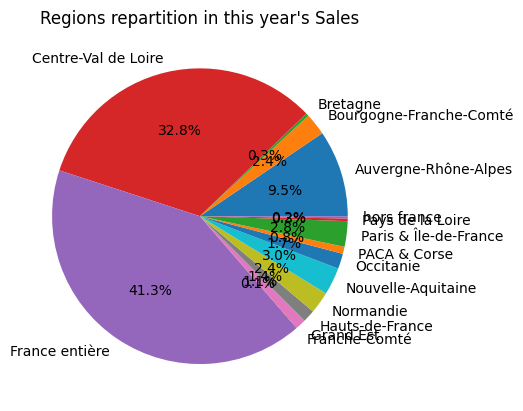

In [135]:
print(sales_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region, labels=sales_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Sales")

### Sales evolution by Region by Year

Region
hors france                 -15.51%
PACA & Corse                  1.28%
Normandie                     23.8%
France entière               42.98%
Nouvelle-Aquitaine           43.69%
Auvergne-Rhône-Alpes         56.17%
Paris & Île-de-France        94.37%
Occitanie                   148.18%
Hauts-de-France             179.46%
Centre-Val de Loire         313.51%
Pays de la Loire            499.68%
Bourgogne-Franche-Comté    2545.12%
Bretagne                       inf%
Franche-Comté                  inf%
Grand Est                      inf%
Name: Sales, dtype: object


Text(0.5, 1.0, 'Sales (in euros) by Region by Year')

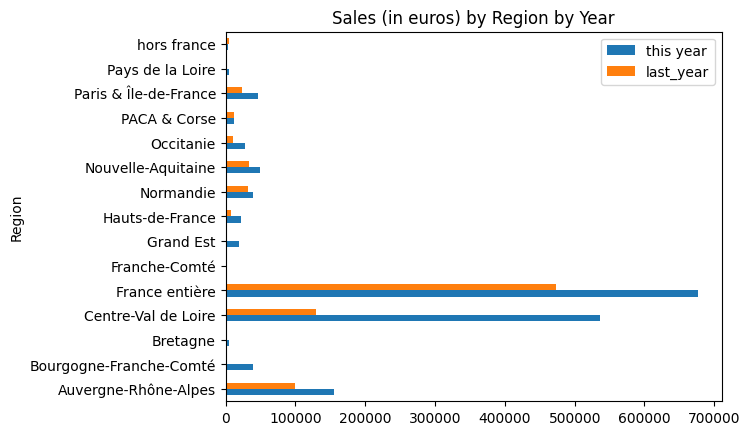

In [177]:
sales_evo_by_region = pd.concat([sales_by_region_last_year, sales_by_region], axis=1)
percentage = (sales_evo_by_region[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_region, "last_year":sales_by_region_last_year}, index=regions)
ax = df.plot.barh()
ax.set_title("Sales (in euros) by Region by Year")

### Regions Weight in last year's Quantities sold

Region
Bretagne                      0.0
Franche-Comté                 0.0
Grand Est                     0.0
hors france                   2.0
Pays de la Loire              5.0
Bourgogne-Franche-Comté      11.0
Occitanie                    61.0
PACA & Corse                 66.0
Hauts-de-France             112.0
Paris & Île-de-France       180.0
Nouvelle-Aquitaine          217.0
Normandie                   252.0
Auvergne-Rhône-Alpes        419.0
Centre-Val de Loire         573.0
France entière             2509.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, "Regions repartition in last year's Quantities")

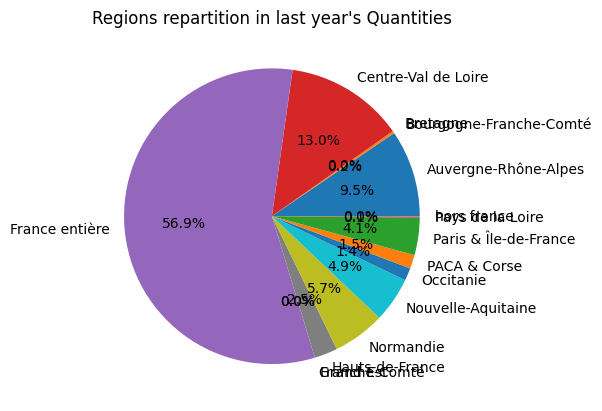

In [137]:
quantity_by_region = sales.groupby("Region")["Quantity"].sum()
quantity_by_region_last_year = sales.groupby("Region")["Quantity Last Year"].sum()
regions = quantity_by_region.keys()

print(quantity_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region_last_year, labels=quantity_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Quantities")

### Regions Weight in this year's Quantities sold


Region
hors france                   3.0
Franche-Comté                 4.0
Bretagne                     31.0
Pays de la Loire             31.0
Grand Est                    65.0
PACA & Corse                 69.0
Occitanie                   105.0
Bourgogne-Franche-Comté     192.0
Nouvelle-Aquitaine          291.0
Normandie                   304.0
Hauts-de-France             310.0
Paris & Île-de-France       397.0
Auvergne-Rhône-Alpes        702.0
Centre-Val de Loire        2025.0
France entière             3681.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, "Regions repartition in this year's Quantities")

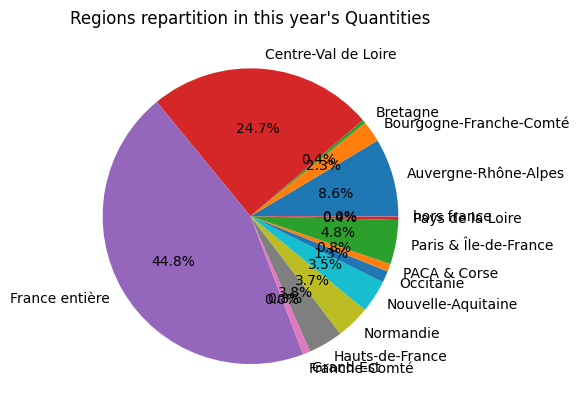

In [138]:
print(quantity_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region, labels=quantity_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Quantities")

### Quantities evolution by Region by Year

Region
PACA & Corse                  4.55%
Normandie                    20.63%
Nouvelle-Aquitaine            34.1%
France entière               46.71%
hors france                   50.0%
Auvergne-Rhône-Alpes         67.54%
Occitanie                    72.13%
Paris & Île-de-France       120.56%
Hauts-de-France             176.79%
Centre-Val de Loire          253.4%
Pays de la Loire             520.0%
Bourgogne-Franche-Comté    1645.45%
Bretagne                       inf%
Franche-Comté                  inf%
Grand Est                      inf%
Name: Quantity, dtype: object


Text(0.5, 1.0, 'Sales (in quantities) evolution by Region by Year')

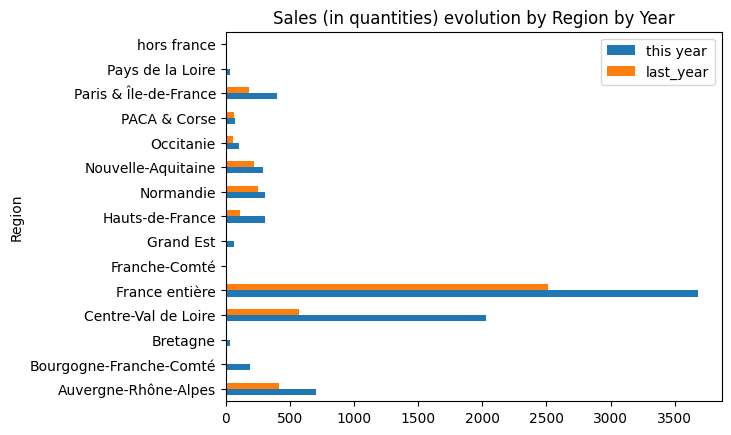

In [179]:
quantity_by_region_evo = pd.concat([quantity_by_region_last_year, quantity_by_region], axis=1)
percentage = (quantity_by_region_evo[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_region, "last_year":quantity_by_region_last_year}, index=regions)
ax = df.plot.barh()
ax.set_title("Sales (in quantities) evolution by Region by Year")

## --- Duration ---

### Weight of activity duration in last year's sales

Duration
10.0         0.00
80.0         0.00
70.0         0.00
50.0         0.00
105.0        0.00
150.0        0.00
22.0         0.00
15.0         0.00
12.0         0.00
35.0       183.25
75.0       666.50
40.0       913.08
90.0      4874.08
25.0      8752.59
45.0     15270.67
20.0     42974.59
30.0     61478.92
60.0     64135.08
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Sales")

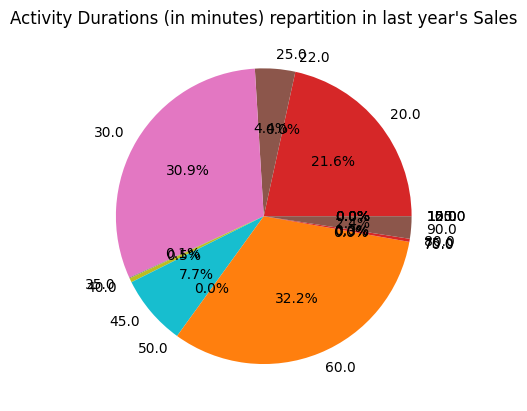

In [140]:
sales_by_duration = sales.groupby("Duration")["Sales"].sum()
sales_by_duration_last_year = sales.groupby("Duration")["Sales Last Year"].sum()
durations = sales_by_duration.keys()

print(sales_by_duration_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_duration_last_year, labels=sales_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in last year's Sales")

### Weight of activity duration in this year's sales

Duration
12.0          0.00
105.0         0.00
22.0          0.00
35.0          0.00
40.0        384.88
70.0        559.65
150.0       793.22
50.0       1049.65
15.0       1550.73
75.0       1568.58
10.0       3590.07
90.0      11901.40
45.0      12231.81
25.0      12956.41
30.0      57989.86
20.0      79963.59
80.0     112809.80
60.0     309198.65
Name: Sales, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Sales")

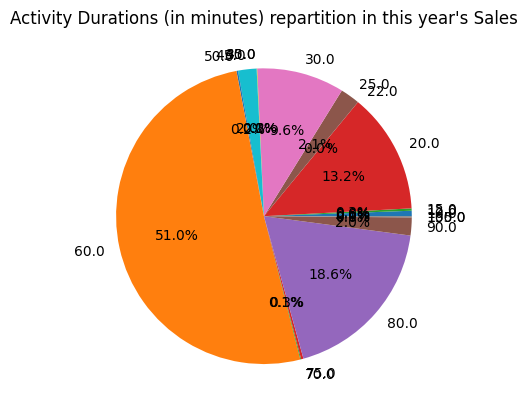

In [141]:
print(sales_by_duration.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_duration, labels=sales_by_duration.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in this year's Sales")

### Sales evolution by Activity Duration by Year

Duration
35.0     -100.0%
40.0     -57.85%
45.0      -19.9%
30.0      -5.68%
25.0      48.03%
20.0      86.07%
75.0     135.35%
90.0     144.18%
60.0     382.11%
10.0        inf%
15.0        inf%
50.0        inf%
70.0        inf%
80.0        inf%
150.0       inf%
Name: Sales, dtype: object


Text(0.5, 1.0, 'Sales evolution (in euros) by Duration by Year')

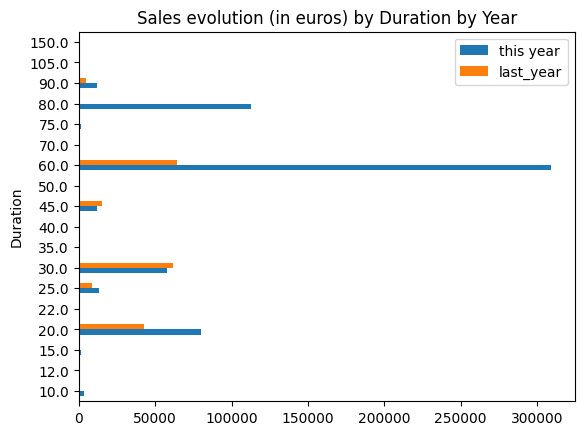

In [186]:
sales_by_duration_evo = pd.concat([sales_by_duration_last_year, sales_by_duration], axis=1)
percentage = (sales_by_duration_evo[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.sort_values().dropna().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_duration, "last_year":sales_by_duration_last_year}, index=durations)
ax = df.plot.barh()
ax.set_title("Sales evolution (in euros) by Duration by Year")

### Weight of activity duration in last year's quantities


Duration
10.0       0.0
80.0       0.0
70.0       0.0
50.0       0.0
105.0      0.0
150.0      0.0
22.0       0.0
15.0       0.0
12.0       0.0
35.0       1.0
75.0       2.0
40.0       3.0
90.0      18.0
25.0      30.0
45.0      88.0
30.0     228.0
20.0     231.0
60.0     378.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Quantities")

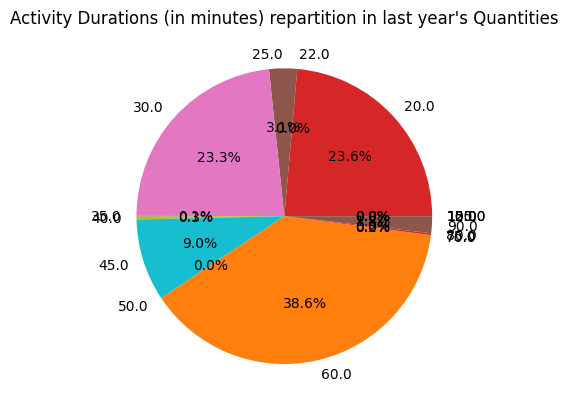

In [182]:
quantity_by_duration = sales.groupby("Duration")["Quantity"].sum()
quantity_by_duration_last_year = sales.groupby("Duration")["Quantity Last Year"].sum()
durations = quantity_by_duration.keys()

print(quantity_by_duration_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_duration_last_year, labels=quantity_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in last year's Quantities")

### Weight of activity duration in this year's quantities


Duration
12.0        0.0
105.0       0.0
35.0        0.0
22.0        0.0
40.0        1.0
150.0       1.0
50.0        4.0
70.0        4.0
75.0        5.0
15.0        9.0
10.0       32.0
25.0       41.0
90.0       44.0
45.0       66.0
30.0      279.0
20.0      516.0
80.0      771.0
60.0     1012.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Quantities")

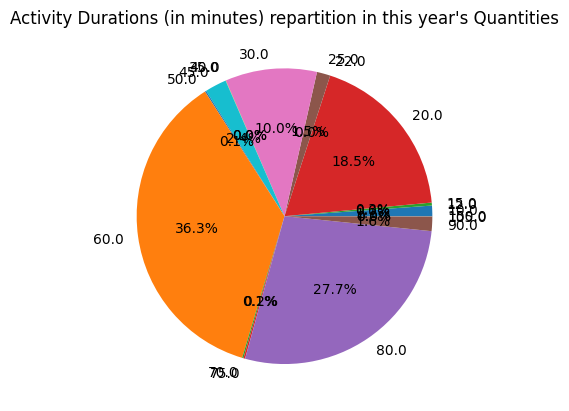

In [183]:
print(quantity_by_duration.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_duration, labels=quantity_by_duration.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in this year's Quantities")

### Quantities evolution by Activity Duration by Year

Duration
35.0     -100.0%
40.0     -66.67%
45.0      -25.0%
30.0      22.37%
25.0      36.67%
20.0     123.38%
90.0     144.44%
75.0      150.0%
60.0     167.72%
10.0        inf%
15.0        inf%
50.0        inf%
70.0        inf%
80.0        inf%
150.0       inf%
Name: Quantity, dtype: object


Text(0.5, 1.0, 'Sales evolution (in quantities) by Duration by Year')

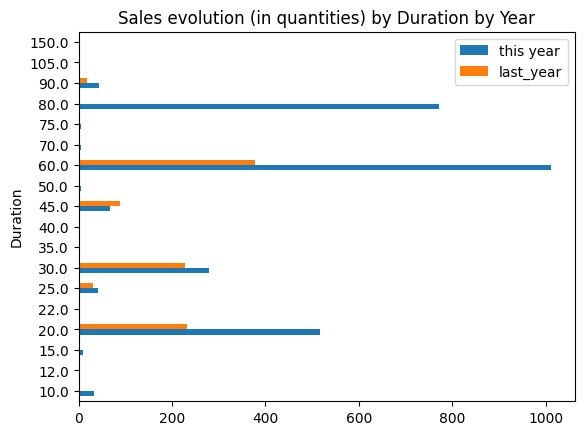

In [185]:
quantity_by_duration_evo = pd.concat([quantity_by_duration_last_year, quantity_by_duration], axis=1)
percentage = (quantity_by_duration_evo[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.sort_values().dropna().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_duration, "last_year":quantity_by_duration_last_year}, index=durations)
ax = df.plot.barh()
ax.set_title("Sales evolution (in quantities) by Duration by Year")

## --- Conversion Rate ---